# Visualizing Wikipedia article histories

In [1]:
import graphviz

Article histories are linear.

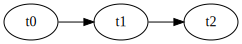

In [2]:
linear = graphviz.Digraph(graph_attr={'rankdir': 'LR'})
linear.node('t0')
linear.node('t1')
linear.node('t2')
linear.edges([
        ('t0', 't1'),
        ('t1', 't2')
    ])
linear

But in reality there are a lot of reversions.

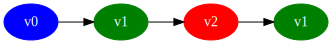

In [3]:
reversions = graphviz.Digraph(
    graph_attr={'rankdir': 'LR'},
    node_attr={'style': 'filled', 'fontcolor': 'white'},
)
reversions.node('t0', label='v0', color='blue')
reversions.node('t1', label='v1', color='green')
reversions.node('t2', label='v2', color='red')
reversions.node('t3', label='v1', color='green')
reversions.edges([
        ('t0', 't1'),
        ('t1', 't2'),
        ('t2', 't3'),
    ])
reversions

### A better way to show article histories is as a tree.

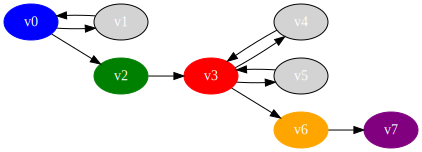

In [4]:
full_tree = graphviz.Digraph(
    graph_attr={'rankdir': 'LR'},
    node_attr={'style': 'filled', 'fontcolor': 'white'},
)
full_tree.node('v0', color='blue')
full_tree.node('v1')
full_tree.node('v2', color='green')
full_tree.node('v3', color='red')
full_tree.node('v4')
full_tree.node('v5')
full_tree.node('v6', color='orange')
full_tree.node('v7', color='purple')

full_tree.edges([
        ('v0', 'v1'),
        ('v1', 'v0'),
        ('v0', 'v2'),
        ('v2', 'v3'),
        ('v3', 'v4'),
        ('v4', 'v3'),
        ('v3', 'v5'),
        ('v5', 'v3'),
        ('v3', 'v6'),
        ('v6', 'v7'),
    ])
full_tree

### This is how edits should be counted.

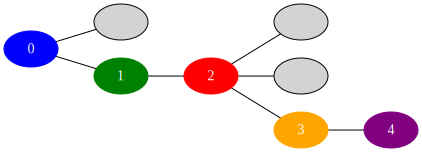

In [5]:
simple = graphviz.Graph(
    graph_attr={'rankdir': 'LR'},
    node_attr={'style': 'filled', 'fontcolor': 'white'},
)
simple.node('v0', label='0', color='blue')
simple.node('v1', label='')
simple.node('v2', label='1', color='green')
simple.node('v3', label='2', color='red')
simple.node('v4', label='')
simple.node('v5', label='')
simple.node('v6', label='3', color='orange')
simple.node('v7', label='4', color='purple')

simple.edges([
        ('v0', 'v1'),
        ('v0', 'v2'),
        ('v2', 'v3'),
        ('v3', 'v4'),
        ('v3', 'v5'),
        ('v3', 'v6'),
        ('v6', 'v7'),
    ])
simple

# What does a real Wikipedia article look like?

In [6]:
import wikivision
revisions = wikivision.get_article_revisions('splendid_fairywren')
revisions.head()

,rev_id,parent_id,timestamp,wikitext,rev_sha1,parent_sha1,rev_version,parent_version,rev_type
365,129420980,0,2007-05-09 02:59:16,{{Taxobox\n| color = pink\n| name = Splendid F...,0860c6aa51c866f79dcc1e54ec994f09c01b37bf,False,0,0,NaN
364,129422530,129420980,2007-05-09 03:07:36,{{Taxobox\n| color = pink\n| name = Splendid F...,f21f402dd42b893f8301f22cf51063afe8f65e48,0860c6aa51c866f79dcc1e54ec994f09c01b37bf,1,0,branch
363,129539246,129422530,2007-05-09 15:41:56,{{Taxobox\n| color = pink\n| name = Splendid F...,552a572722c7527358db0a7274fe61ef759306e1,f21f402dd42b893f8301f22cf51063afe8f65e48,2,1,branch
362,129712279,129539246,2007-05-10 02:21:32,{{Taxobox\n| color = pink\n| name = Splendid F...,833667d437fbe3b2f7aefc538a6acdc9f0b33f5a,552a572722c7527358db0a7274fe61ef759306e1,3,2,branch
361,129753223,129712279,2007-05-10 06:14:07,{{Taxobox\n| color = pink\n| name = Splendid F...,c0f01ff3330b8db49f6134aa059f439b2c4955bf,833667d437fbe3b2f7aefc538a6acdc9f0b33f5a,4,3,branch


In [7]:
def graph(edges, remove_labels=False):
    """Create a simple revision history Digraph from a pandas DataFrame.
    
    Args:
        edges: A DataFrame with two columns, the first is the **from** column
            and the second is the **to** column. Nodes are derived from edges.
        remove_labels: Should the labels be removed from the nodes? Useful
            when graphing actual revision histories and nodes are named with
            long hashes, in which case the labels are probably not needed.
    """
    g = graphviz.Digraph(graph_attr={'rankdir': 'LR'})
    
    # add the nodes
    nodes = set(edges.iloc[:, 0]).union(set(edges.iloc[:, 1]))
    for name in nodes:
        label = '' if remove_labels else name
        g.node(name, label=label)
    
    # add the edges
    g.edges([(from_node, to_node) for _, (from_node, to_node) in edges.iterrows()])
    
    return g

def graph_article_revisions(article_slug):
    """Create a Digraph from a Wikipedia article's revision history."""
    revisions = wikivision.get_article_revisions(article_slug)
    revision_edges = revisions[['parent_sha1', 'rev_sha1']].iloc[1:]
    return graph(revision_edges, remove_labels=True)

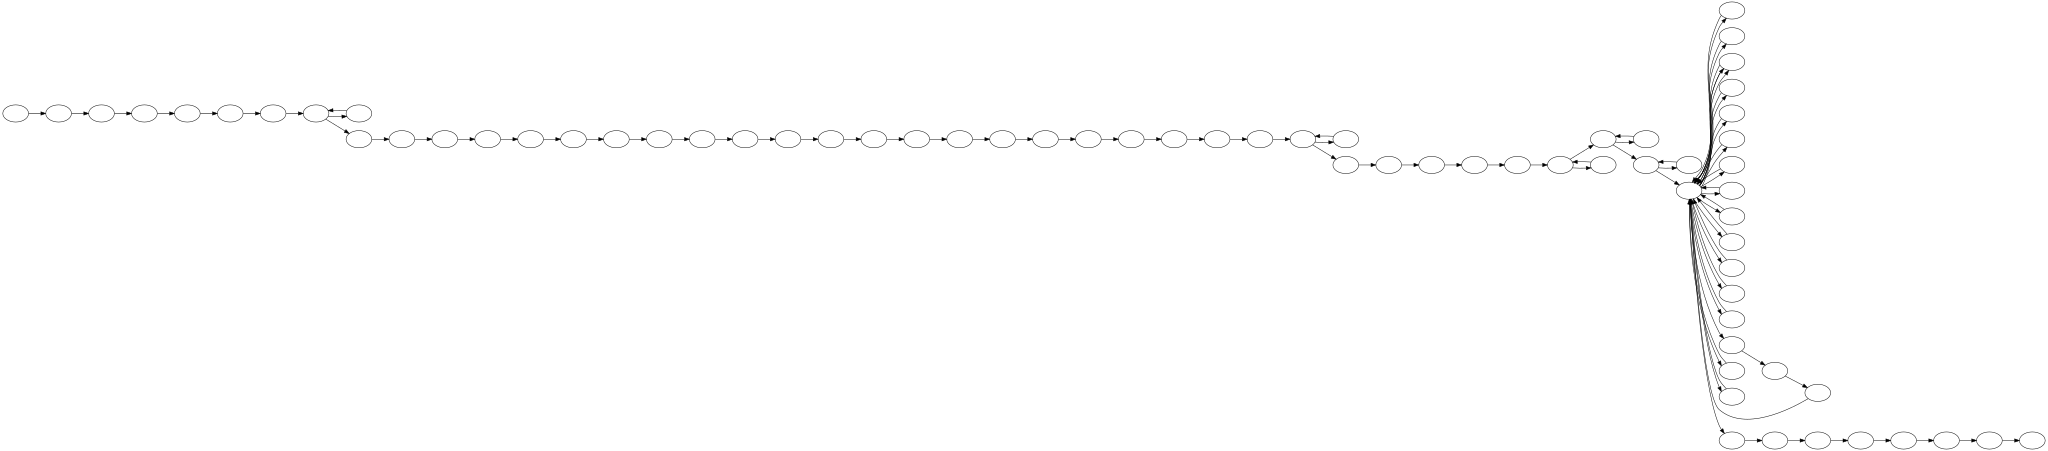

In [8]:
graph_article_revisions('splendid_fairywren')

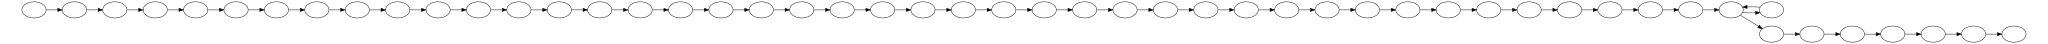

In [9]:
graph_article_revisions('Google_DeepMind')

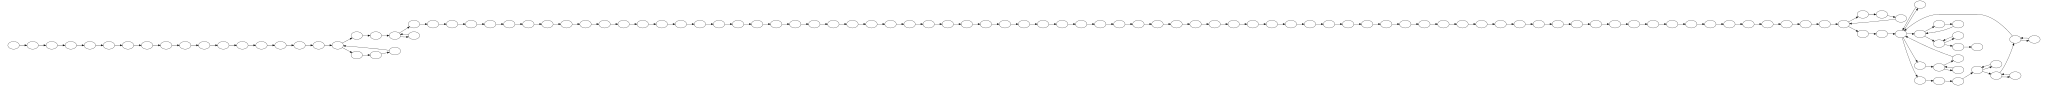

In [10]:
graph_article_revisions('Shepseskare')

In [ ]:
graph_article_revisions('Tiger')